# Data preparation

In [ ]:
# The Titanic disaster dataset contains the following variables:

# Survived - Survival of the passenger (0 = No; 1 = Yes)
# Pclass - The class of the ticket that was purchased (1 = 1st; 2 = 2nd; 3 = 3rd)
# Name - The name of the passenger (object / string)
# Sex - The sex of the passenger (male/female)
# Age - The age of the passenger (float)
# SibSp - The number of Siblings/Spouses Aboard (int)
# Parch - The number of Parents/Children Aboard (int)
# Ticket - Ticket number (object / string)
# Fare - The fare the passenger paid (float)
# Cabin - Cabin (object / string)
# Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# The main objective is to develop, and evaluate a couple of classification models
# using KNN Classifier. You should take care of the model parameters in an attempt to
# get the models that perform better than those with random or default parameters.
# More specificaly, you are expected to find the best K using two different methods
# (and develop a model with each K). Likewise, you are expected to tune several parameters
# (not only K) for one of the models.
# Briefly explain which model has performed better.

In [1]:
#@title Data load
# Load a csv file
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/sdimitrijevic/ai-ml/main/datasets/titanic.csv'
df = pd.read_csv(url)

# from a file
# df = pd.read_csv("datasets\titanic.csv")

df.shape

(891, 12)

In [2]:
#@title Checking data
# First 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Since categorical variables cannot be used in KNN, a simple mapper is used here
# to transform female/male into 1/0.

scale_mapper = {"female":1, "male":0}
df['Sex']= df['Sex'].replace(scale_mapper)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
# Removing non-numerical variables and PassangerId
non_num_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

for i in non_num_columns:
    df = df.drop([i],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
# Checking status (class) balance
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
from scipy.stats import shapiro

# Columns without the first one ('Survived')
columns =  df.columns[1:]

# Checking if numeric variables follow normal distribution
for i in columns:    
    print(i)
    # normality test
    stat, p = shapiro(df[i])
    print('\n(W)= %e,\n p = %e' % ( stat, p ))     

    if p > 0.05:        
        print('\nSample looks Gaussian\n')
    else:        
        print('\nSample does not look Gaussian\n')

Pclass

(W)= 7.183379e-01,
 p = 3.395832e-36

Sample does not look Gaussian

Sex

(W)= 6.041008e-01,
 p = 6.197383e-41

Sample does not look Gaussian

Age

(W)= nan,
 p = 1.000000e+00

Sample looks Gaussian

SibSp

(W)= 5.129655e-01,
 p = 5.745324e-44

Sample does not look Gaussian

Parch

(W)= 5.328145e-01,
 p = 2.382207e-43

Sample does not look Gaussian

Fare

(W)= 5.218918e-01,
 p = 1.079000e-43

Sample does not look Gaussian



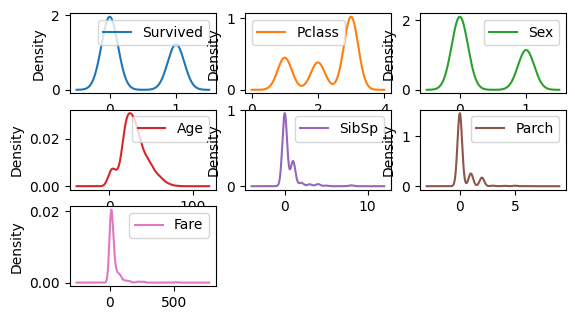

In [ ]:
# Univariate Plots (Density Plots)
from matplotlib import pyplot as plt

df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

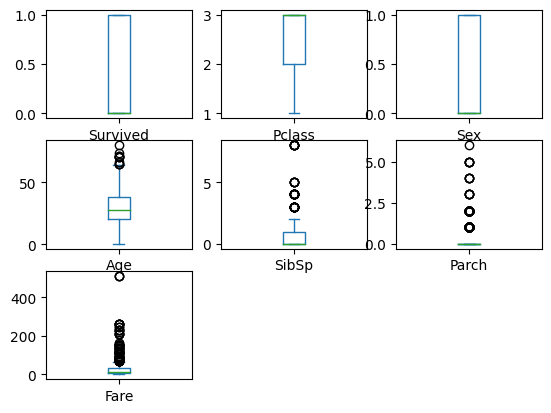

In [ ]:
# Exploring outliers
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

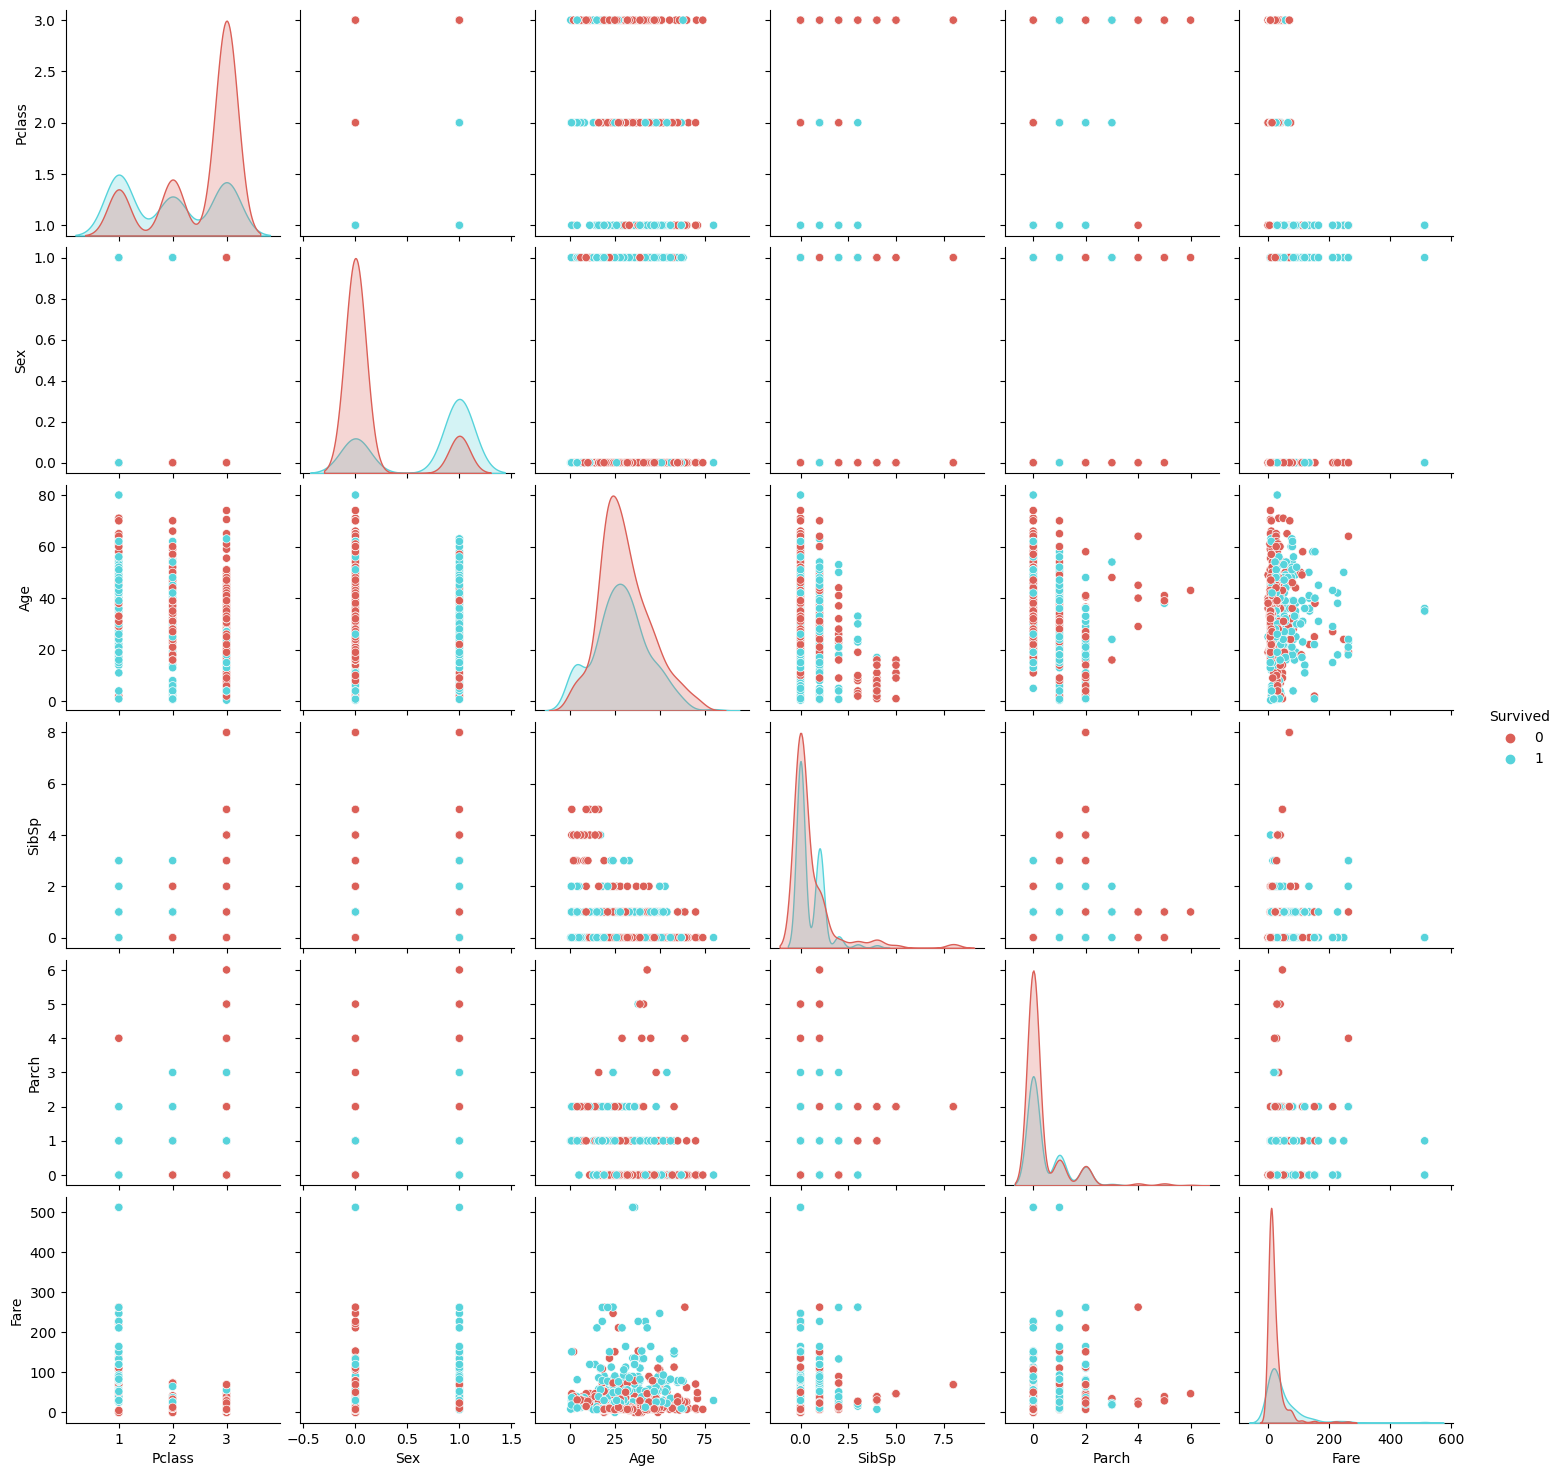

In [ ]:
# Visualizing outliers
import seaborn as sns
# Outliers 
  # Outlier is a data point that differs significantly from other observations
  # Outlier may be due to variability in the measurement or it may indicate experimental error
  # Outliers are sometimes excluded from the data set
sns.pairplot(data = df, hue="Survived", palette="hls");

In [ ]:
#@title Fixing up data outliers

import scipy.stats as stats

def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:
        
#         lower_bound = df[col].quantile(from_low_end)
#         upper_bound = df[col].quantile(1-from_high_end)
        
#         df[col] = np.where(df[col]>upper_bound, upper_bound,
#                  np.where(df[col]<lower_bound, lower_bound, df[col]))

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [ ]:
# Here, only outliers in normaly distributed variables are fixed.

# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end
percentile_capping(df, ['Age'], 0, 0.1)

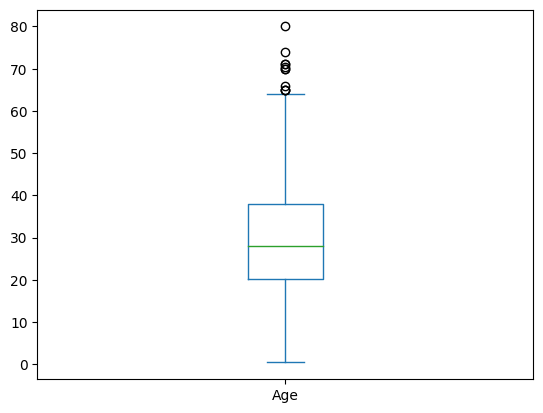

<Figure size 2000x1400 with 0 Axes>

In [ ]:
# Checking outliers in Age after percentile capping
df['Age'].plot(kind='box')
fig = plt.figure(figsize =(20, 14))
fig.show()

In [ ]:
# Repeating  percentile capping
percentile_capping(df, ['Age'], 0, 0.1)

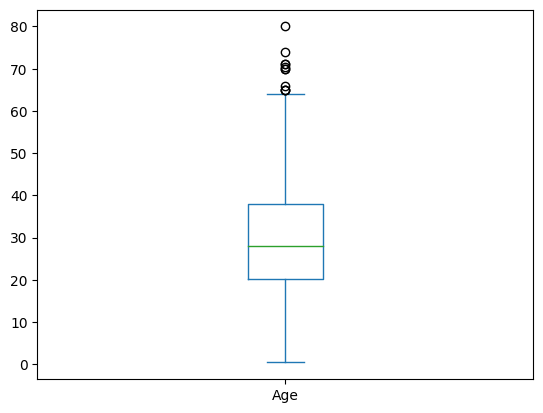

<Figure size 2000x1400 with 0 Axes>

In [ ]:
# Checking outliers in Age after percentile capping
df['Age'].plot(kind='box')
fig = plt.figure(figsize =(20, 14))
fig.show()

In [ ]:
# Repeating  percentile capping
percentile_capping(df, ['Age'], 0, 0.2)

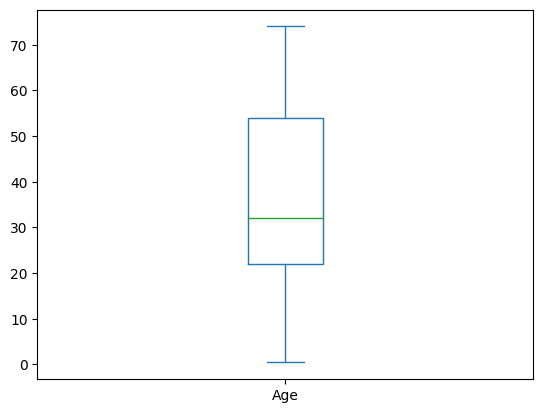

<Figure size 2000x1400 with 0 Axes>

In [ ]:
# Checking outliers in Age after percentile capping
df['Age'].plot(kind='box')
fig = plt.figure(figsize =(20, 14))
fig.show()

In [ ]:
#@title Splitting data
from sklearn.model_selection import train_test_split

# Spliting x axis and y axis
y = df['Survived']
x = df.drop(['Survived'],axis=1)

# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

x_test.shape,y_test.shape

((268, 6), (268,))

In [ ]:
# Addressing class imbalance

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)
print(f"Testing target statistics: {Counter(y_train)}")

Testing target statistics: Counter({1: 381, 0: 381})


In [ ]:
#@title Data Rescaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# Data rescaling
rscaler = RobustScaler()
sscaler = StandardScaler()

# Variables that do not look normaly distributed
x_train[['Pclass','SibSp','Parch','Fare']] = pd.DataFrame(rscaler.fit_transform(x_train[['Pclass','SibSp','Parch','Fare']]),
                                                                                index=x_train[['Pclass','SibSp','Parch','Fare']].index,
                                                                                columns=['Pclass','SibSp','Parch','Fare'])

x_test[['Pclass','SibSp','Parch','Fare']] = pd.DataFrame(rscaler.transform(x_test[['Pclass','SibSp','Parch','Fare']]),
                                                                                index=x_test[['Pclass','SibSp','Parch','Fare']].index,
                                                                                columns=['Pclass','SibSp','Parch','Fare'])


# Variables that do look normaly distributed
x_train[['Age']] = pd.DataFrame(sscaler.fit_transform(x_train[['Age']]),
                                                     index=x_train[['Age']].index,
                                                     columns=['Age'])

x_test[['Age']] = pd.DataFrame(sscaler.transform(x_test[['Age']]),
                                                 index=x_test[['Age']].index,
                                                 columns=['Age'])

In [ ]:
x_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,762.000000,762.000000,7.620000e+02,762.000000,762.000000,762.000000
mean,-0.380577,0.404199,-1.864942e-17,0.510499,0.396325,0.698860
std,0.426816,0.491059,1.000657e+00,1.102152,0.828460,2.000203
min,-1.000000,0.000000,-1.703766e+00,0.000000,0.000000,-0.601134
25%,-1.000000,0.000000,-7.308633e-01,0.000000,0.000000,-0.301512
50%,0.000000,0.000000,-2.747438e-01,0.000000,0.000000,0.000000
75%,0.000000,1.000000,6.374953e-01,1.000000,0.000000,0.698488
max,0.000000,1.000000,1.640958e+00,8.000000,6.000000,18.768590


In [ ]:
x_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,-0.320896,0.369403,0.024060,0.503731,0.354478,0.594087
std,0.412370,0.483546,1.021444,0.950057,0.742817,2.002642
min,-1.000000,0.000000,-1.715169,0.000000,0.000000,-0.601134
25%,-0.500000,0.000000,-0.730863,0.000000,0.000000,-0.302616
50%,0.000000,0.000000,-0.297550,0.000000,0.000000,-0.109641
75%,0.000000,1.000000,0.819943,1.000000,0.000000,0.505435
max,0.000000,1.000000,1.640958,5.000000,5.000000,18.768590


# KNN

In [ ]:
#@title KNN 1 - Hyperparameter tuning - Several parameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Listing Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,100))


# Converting to dictionary
param_dist = dict(leaf_size=leaf_size, n_neighbors=n_neighbors,algorithm=["auto","ball_tree","kd_tree","brute"])


# Creating new KNN object
knn_temp = KNeighborsClassifier()

# Using RendomizedSearch
# By default, parameter search uses the score function of the estimator to evaluate
# a parameter setting. These are the sklearn.metrics.accuracy_score for classification
# and sklearn.metrics.r2_score for regression...
randm = RandomizedSearchCV(knn_temp, param_dist, cv=10, scoring='roc_auc', n_iter=10, random_state=5)

#Fit the model
randm_fit = randm.fit(x_train,y_train)

In [ ]:
# # Creating a variable for the best model
knn1 = randm_fit.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  randm_fit.best_params_)

Best hyperparameters: {'n_neighbors': 3, 'leaf_size': 3, 'algorithm': 'kd_tree'}


In [ ]:
#@title KNN1 Evaluation
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Predicting a class / outcome using test data
y_pred1 = knn1.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred1)

array([[127,  41],
       [ 27,  73]])

In [ ]:
from sklearn import metrics

# Accuracy
knn1_accuracy = metrics.accuracy_score(y_test, y_pred1)

# Precision
knn1_precision = metrics.precision_score(y_test, y_pred1)

# Recall
knn1_recall = metrics.recall_score(y_test, y_pred1)

# F1
knn1_f1 = metrics.f1_score(y_test, y_pred1)

print("\nAccuracy: ", knn1_accuracy,
      "\nPrecision: ", knn1_precision,
      "\nRecall: ", knn1_recall,
      "\nF1: ", knn1_f1)


Accuracy:  0.746268656716418 
Precision:  0.6403508771929824 
Recall:  0.73 
F1:  0.6822429906542056


In [ ]:
#@title KNN 2 - Hyperparameter tuning - No CV
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


tt = {}
il = []
auc=[]

# Looking for the best K value by getting Receiver Operating Characteristic Accuracy for each K ranging from 1 to 100
for  i in range(1,100):  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  il.append(i)
  auc.append(sklearn.metrics.roc_auc_score(y_test,y_pred))
  tt.update({'K':il})
  tt.update({'ROC_AUC':auc})
 
  vv = pd.DataFrame(tt)

vv_sorted = vv.sort_values('ROC_AUC',ascending=False,ignore_index=True)

vv_sorted.head(10)

,K,ROC_AUC
0,28,0.797857
1,31,0.797857
2,30,0.797857
3,49,0.796905
4,29,0.796905
5,42,0.795833
6,34,0.795833
7,32,0.795833
8,50,0.794881
9,47,0.794881


Text(0, 0.5, 'ROC_AUC')

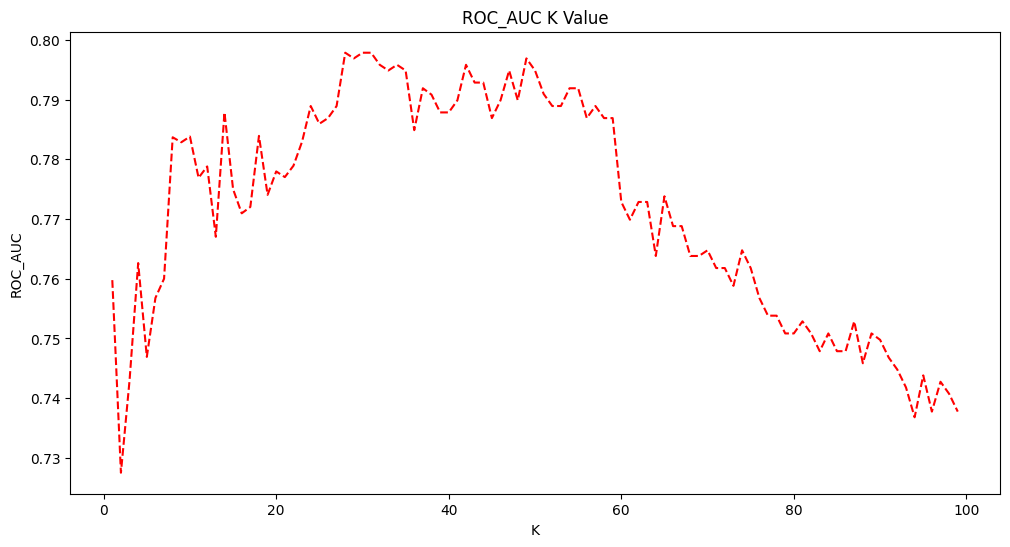

In [ ]:
# Plotting 
y_plt = vv['ROC_AUC']
x_plt = vv['K']
plt.figure(figsize=(12, 6))
plt.plot(x_plt, y_plt, color='red', linestyle='dashed')
plt.title('ROC_AUC K Value')
plt.xlabel('K')
plt.ylabel('ROC_AUC')

In [ ]:
# Initializing KNN with the best K
knn2 = KNeighborsClassifier(n_neighbors=28)
# Fitting the model
knn2 = knn2.fit(x_train,y_train)

In [ ]:
#@title KNN 2 Evaluation

# Predicting a class / outcome using test data
y_pred2 = knn2.predict(x_test)

In [ ]:
# Calculating confusion matrix
confusion_matrix(y_test, y_pred2)

array([[132,  36],
       [ 19,  81]])

In [ ]:
# Compute evaluation metrics:

# Accuracy
knn2_accuracy = metrics.accuracy_score(y_test, y_pred2)

# Precision
knn2_precision = metrics.precision_score(y_test, y_pred2)

# Recall
knn2_recall = metrics.recall_score(y_test, y_pred2)

# F1
knn2_f1 = metrics.f1_score(y_test, y_pred2)

print("DTC1 accuracy: ", knn2_accuracy,
      "\nDTC1 precision: ", knn2_precision,
      "\nDTC1 recall: ", knn2_recall,
      "\nDTC1 F1: ", knn2_f1)

DTC1 accuracy:  0.7947761194029851 
DTC1 precision:  0.6923076923076923 
DTC1 recall:  0.81 
DTC1 F1:  0.7465437788018433


In [ ]:
#@title KNN 3 - Hyperparameter tuning - RendomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Listing Hyperparameters that we want to tune.
#leaf_size = list(range(1,10))
n_neighbors = list(range(1,100))


# Converting to dictionary
# param_dist = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)
param_dist = dict(n_neighbors=n_neighbors)

# Creating new KNN object
knn_temp = KNeighborsClassifier()

# Using RendomizedSearch
# By default, parameter search uses the score function of the estimator to evaluate
# a parameter setting. These are the sklearn.metrics.accuracy_score for classification
# and sklearn.metrics.r2_score for regression...
rand = RandomizedSearchCV(knn_temp, param_dist, cv=10, scoring='roc_auc', n_iter=10, random_state=5)

# Fitting the model
rand_fit = rand.fit(x_train,y_train)

In [ ]:
# Creating a variable for the best model
knn3 = rand_fit.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_fit.best_params_)

Best hyperparameters: {'n_neighbors': 18}


In [ ]:
#@title KNN3 Evaluation

# Predicting a class / outcome using test data
y_pred3 = knn3.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred3)

array([[129,  39],
       [ 20,  80]])

In [ ]:
# Accuracy
knn3_accuracy = metrics.accuracy_score(y_test, y_pred3)

# Precision
knn3_precision = metrics.precision_score(y_test, y_pred3)

# Recall
knn3_recall = metrics.recall_score(y_test, y_pred3)

# F1
knn3_f1 = metrics.f1_score(y_test, y_pred3)

print("\nAccuracy: ", knn3_accuracy,
      "\nPrecision: ", knn3_precision,
      "\nRecall: ", knn3_recall,
      "\nF1: ", knn3_f1)


Accuracy:  0.7798507462686567 
Precision:  0.6722689075630253 
Recall:  0.8 
F1:  0.7305936073059361


In [ ]:
#@title Comparison of metrics

df_compare = pd.DataFrame([(knn1_accuracy, knn2_accuracy, knn3_accuracy),
                    (knn1_precision, knn2_precision, knn3_precision),
                    (knn1_recall, knn2_recall, knn3_recall),
                    (knn1_f1, knn2_f1, knn3_f1)],
           columns=('KNN1 (Hyperparameter tuning)', 'KNN2 (K tunned - No CV)', 'KNN3 (K tunned - RandomizedSearchCV)'),
           index=('Accuracy', 'Precision', 'Recall', 'F1')
                 )

df_compare.head()

,KNN1 (Hyperparameter tuning),KNN2 (K tunned - No CV),KNN3 (K tunned - RandomizedSearchCV)
Accuracy,0.746269,0.794776,0.779851
Precision,0.640351,0.692308,0.672269
Recall,0.730000,0.810000,0.800000
F1,0.682243,0.746544,0.730594


In [ ]:
# KNN2 performed best; slightly better that KNN3.
# Expanding or adjusting the hyperparameter space when hyperparameter tuning KNN1 
# might lead to its better performance.